In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport

In [2]:
test_data = pd.read_csv("test_data.csv", header=None)
train_data = pd.read_csv(os.path.join('train_data.csv'),header=None)
train_labels = pd.read_csv(os.path.join('train_labels.csv'), header=None)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391


In [4]:
train_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3745,338.539,-98.216,-37488.883,-2346.403,-291.325,553.155,1041.511,391.664,1016.730,49.772,...,350.501,-607.873,430.407,-469.737,68.670,328.636,105.448,-368.834,378.017,-253.044
3746,105.511,-167.468,54447.468,-38055.924,-12394.035,711.218,100.459,-1377.005,-171.175,-325.444,...,4.759,-9.079,104.333,4.676,-1069.879,-92.252,86.110,-4.935,433.674,-355.118
3747,93.186,-155.288,-16555.534,-10605.421,-3027.792,-80.498,-2201.598,-49.392,-848.946,-252.714,...,-342.855,-151.956,7.386,564.910,613.541,-570.735,-5.810,797.659,-289.170,-2025.470
3748,857.066,98.182,-39429.721,26215.357,-1465.352,-340.496,-992.109,990.646,140.943,-281.100,...,200.827,-1445.572,-39.879,421.075,-191.389,-538.616,141.365,552.974,310.130,207.084
3749,-169.394,127.276,-24661.781,37020.744,-17491.827,46.510,560.459,155.117,-217.523,-448.290,...,-87.249,-419.265,224.068,-75.648,-302.584,-164.119,19.465,-841.065,-973.910,-803.150


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 286.1 MB


In [6]:
duplicate_rows_df = train_data[train_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10000)


In [7]:
train_data.isnull().sum().sum()

0

In [8]:
display(train_data.describe())

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,30.644135,9.080955,169.679419,811.083532,-186.008805,25.717789,24.918118,19.061259,14.826002,14.970447,...,13.997377,21.456582,22.586461,16.736889,13.992185,-1.426345,9.597250,-2.031243,-2.841237,38.071903
std,286.172414,213.166659,43665.003613,57123.457110,21942.466227,711.556331,898.109174,868.676044,532.727247,236.749501,...,269.223339,545.746530,265.221187,503.416444,818.825405,655.666258,204.731554,793.022407,629.128655,768.405732
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-163.781750,-135.343500,-29284.119500,-38028.429000,-14426.799500,-448.696750,-590.170250,-562.956500,-349.689750,-144.157750,...,-169.777250,-352.959500,-154.639750,-328.083750,-550.599000,-432.000750,-129.076250,-561.304000,-424.192750,-462.828000
50%,35.478500,2.680500,1181.698500,980.588000,-154.835000,13.931500,13.674000,16.750500,9.731000,11.159500,...,18.700000,38.348500,26.199500,14.575500,1.363500,-3.796500,8.600500,-4.243000,-7.628000,28.107000
75%,215.780500,156.095750,29630.914500,40561.960250,14515.833000,506.893250,630.490750,608.698000,383.110500,179.768250,...,196.049000,396.868500,198.237250,356.185500,574.453250,425.338000,149.855750,539.550000,427.794500,552.173500
max,1224.394000,722.868000,177744.241000,215372.854000,86287.955000,2446.466000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2664.074000


In [9]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,179.171,102.366,-90318.459,-76354.589,-30178.335,617.269,-1282.834,-1096.950,171.635,-19.206,...,-43.192,-224.675,12.324,232.965,152.504,122.130,107.225,565.803,537.527,-60.706
1,106.673,-63.988,14393.611,-23722.852,-9392.469,449.456,-562.289,-536.924,-1162.814,168.002,...,-390.906,-49.040,94.748,-168.545,612.119,-216.957,-5.355,-315.510,-145.489,-1254.983
2,-4.873,-205.671,-28555.498,7933.658,4245.138,1603.993,-914.152,1449.421,-700.017,460.350,...,-0.575,162.502,178.716,-403.328,504.106,179.730,-186.519,481.705,-404.409,-896.072
3,-190.940,195.398,7372.475,-57092.149,21447.785,508.022,1256.862,1498.347,569.061,16.259,...,19.651,-18.126,104.865,336.881,1799.097,359.658,102.798,242.973,-536.491,316.552
4,-235.533,332.318,47801.547,-48097.081,-8387.428,-1062.866,-511.930,908.649,-424.938,322.100,...,-302.825,-358.884,-94.971,109.459,189.027,-990.600,125.996,-1309.715,-510.876,768.972


In [10]:
test_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1245,21.776,-222.556,8095.867,90465.120,6686.774,-465.616,-426.894,-1747.209,509.908,276.269,...,451.521,1019.348,-266.861,280.309,-695.037,637.692,-20.717,-1148.695,-981.060,-392.707
1246,307.589,30.730,-64828.753,-39763.673,-14386.022,482.946,-30.974,74.296,-0.440,39.848,...,202.574,-219.427,-469.703,70.817,1533.971,416.212,-97.764,-216.053,-177.531,-692.703
1247,-177.018,-104.096,-48775.402,17667.111,419.664,1138.318,-1120.659,-264.515,-1194.275,103.109,...,-36.504,157.159,-212.634,172.301,1638.638,-163.936,293.462,1160.810,288.617,1471.433
1248,-326.849,40.144,13642.097,-32798.878,5832.955,-20.743,-203.425,-274.775,149.339,-4.647,...,-458.037,566.926,322.426,-671.599,-195.527,-94.454,313.405,1551.549,122.852,132.479
1249,-203.069,-171.083,47293.212,63753.116,12690.826,157.979,-842.595,268.169,215.916,239.403,...,-350.198,230.542,-123.835,320.136,-187.061,395.384,-75.988,-707.434,-796.226,695.061


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 95.4 MB


In [12]:
duplicate_rows_df = test_data[test_data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 10000)


In [13]:
test_data.isnull().sum().sum()

0

In [14]:
display(test_data.describe())

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,6.892262,24.231871,691.035041,-923.186420,472.853216,-5.603389,-8.430038,18.087694,45.521371,5.532402,...,11.476222,33.046902,14.964225,1.617977,0.966285,27.937748,17.698405,-5.434074,2.335376,18.155565
std,279.865345,208.490530,43757.863316,57126.680674,21901.701715,713.053055,920.126198,878.797561,522.835391,228.835834,...,269.321713,545.254843,279.002383,484.089443,811.995519,668.026761,205.254268,795.507890,618.042044,777.694783
min,-1105.426000,-649.565000,-155113.836000,-184240.160000,-91291.593000,-2035.416000,-2908.191000,-2716.201000,-1637.602000,-841.328000,...,-754.360000,-2337.359000,-843.832000,-1660.371000,-3048.856000,-1897.451000,-656.654000,-2452.794000,-2080.857000,-2991.225000
25%,-176.906000,-116.729500,-27510.364750,-41059.084000,-13750.416000,-520.422750,-635.170750,-562.046500,-343.264000,-154.387000,...,-178.323000,-326.482750,-177.293750,-334.303250,-533.827500,-395.463000,-128.044750,-539.452750,-416.250500,-510.043500
50%,12.362000,20.508000,-444.999500,-397.729500,765.368500,-8.634000,38.824500,6.567500,42.814500,13.917000,...,12.929500,14.458000,18.659500,3.275500,-7.966500,26.660500,25.876000,11.653000,-1.106000,26.721500
75%,185.231250,171.514250,31295.237500,36278.893000,14594.061750,493.204250,625.198250,613.078500,406.646750,161.198250,...,199.985000,381.024250,205.077500,335.198500,573.268250,465.582000,157.331750,548.572500,424.111750,554.481750
max,1053.495000,736.906000,141244.534000,177561.749000,60844.690000,2397.488000,2987.201000,2916.440000,1765.077000,684.350000,...,1093.874000,2010.261000,914.288000,1647.605000,2444.526000,2412.412000,610.140000,2354.781000,1989.205000,2157.461000


In [15]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3750 non-null   int64
dtypes: int64(1)
memory usage: 29.4 KB


In [16]:
train_labels.value_counts()

 1    3375
-1     375
dtype: int64

<AxesSubplot:xlabel='0'>

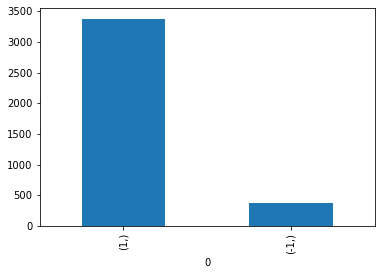

In [17]:
train_labels.value_counts().plot(kind='bar')

In [18]:
trainX, testX, trainy, testy = train_test_split(train_data, train_labels, test_size=0.3, random_state=2)
trainX

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
948,-132.198,27.952,50867.084,-75848.815,8418.350,601.550,91.919,-1699.642,-450.175,453.349,...,-184.474,-467.373,122.417,-103.960,478.990,-248.154,99.116,-580.848,23.338,-139.141
1650,475.245,-362.344,4232.808,-54693.421,13537.331,-708.420,-1224.606,902.005,-294.028,-4.017,...,-517.286,949.543,-503.989,-46.507,-427.881,133.324,104.053,-611.567,269.676,682.279
594,-234.911,304.246,-40938.896,-12140.209,1078.112,-640.564,-11.907,-58.509,602.641,39.311,...,115.461,284.449,116.355,150.763,-667.708,-115.581,81.295,-74.412,-340.530,-355.538
742,-303.465,-114.416,10906.922,-54916.371,-8581.826,-44.507,321.144,-2.034,-98.975,370.481,...,-142.771,116.654,-15.928,916.975,-360.081,1600.837,-100.267,-474.677,-573.220,921.482
1661,289.119,130.298,3324.608,46856.758,9155.681,1094.822,-1451.213,531.712,-186.690,281.506,...,598.462,-554.247,-141.145,-59.332,-276.138,-127.762,-273.945,37.181,-872.535,30.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,-21.480,-147.032,-89897.646,-92512.337,-19006.072,819.525,2356.847,510.259,-641.130,-401.137,...,83.420,565.486,257.350,-166.896,521.186,1098.677,65.044,-700.967,-733.868,-423.102
1608,-563.119,58.369,-32825.370,-49239.766,7956.557,541.384,346.552,-162.447,-130.408,-16.550,...,-219.814,351.614,279.710,-678.003,494.233,-370.712,-131.760,-583.032,101.332,-691.675
2541,-127.392,275.081,-39358.569,82826.871,6056.274,859.778,-750.506,-260.434,531.475,-234.361,...,338.351,829.471,411.584,-796.612,-658.057,649.717,-404.758,1013.193,-792.774,1291.920
2575,-333.002,-192.938,-21752.214,45483.037,12090.757,109.675,815.800,-1202.157,-9.877,90.050,...,67.147,-747.371,-126.644,-55.135,-679.106,451.234,-199.710,-463.489,724.337,1177.421


In [19]:
sc = StandardScaler()
X_train_standarized = sc.fit_transform(trainX)
X_test_standarized = sc.transform(testX)

In [20]:
pca = PCA(n_components=2, whiten=True)

In [21]:
X_pca = pca.fit_transform(X_train_standarized)
df_pca = pd.DataFrame(X_pca, columns = ['Principal Component 1','Principal Component 2'])
df_pca = df_pca.assign(labels=(trainy).values)
df_pca

,Principal Component 1,Principal Component 2,labels
0,1.479408,-1.494911,1
1,-0.103280,0.362116,1
2,1.028682,1.271748,1
3,-0.124455,0.404245,1
4,0.681566,-1.965832,1
...,...,...,...
2620,-1.916429,3.109303,1
2621,-1.297167,0.019889,1
2622,-0.257845,-1.615439,1
2623,-0.282163,-0.405823,1


<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

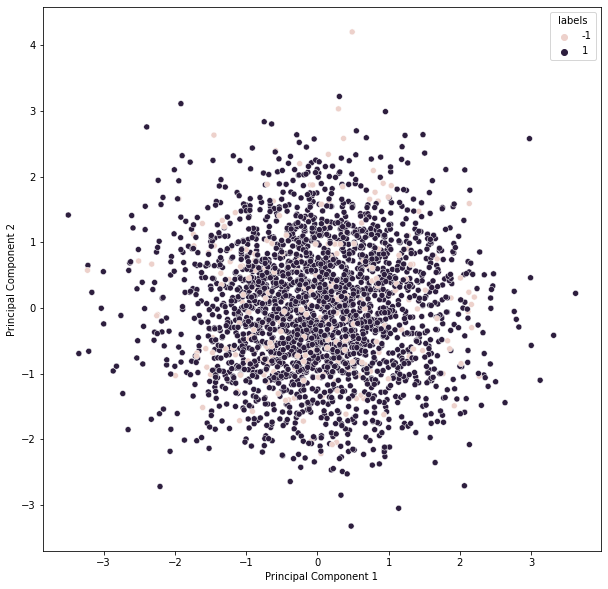

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x="Principal Component 1", y="Principal Component 2", hue="labels")


In [23]:
prof_report = ProfileReport(df_pca)
prof_report

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]